In [60]:
# Import required packages here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [61]:
df = pd.read_csv("/Users/lukecarroll/Desktop/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [62]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Dataset Descriptives

In [63]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [64]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [65]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Data appears to be a full dataset so no imputation or data removal is required.

# Data Visulisation
Visual inspection of the data will be conducted to identify any abnormalities in the dataset. This will also be used to gather an understanding of the data, including patterns and preliminary analysis of relationships between varaibles.

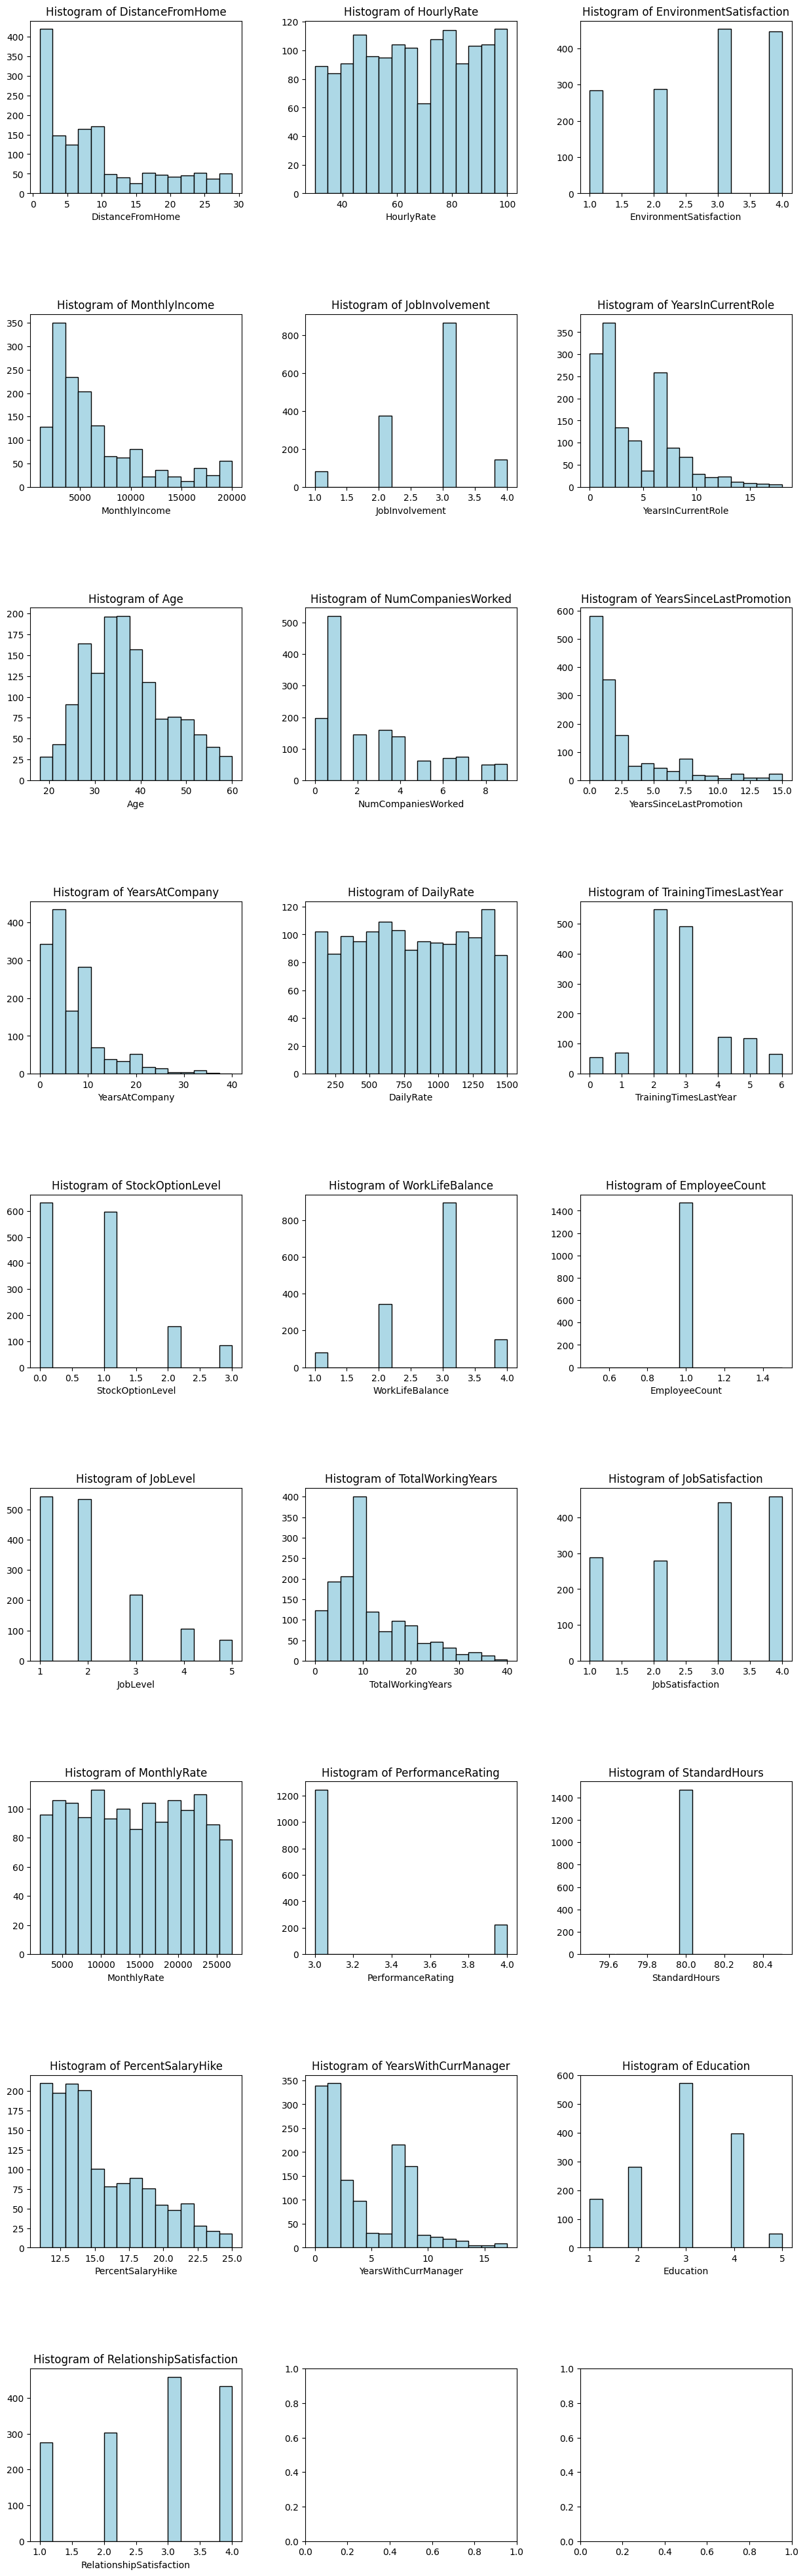

In [66]:
df = df.drop(columns=['EmployeeNumber', 'Over18'])
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
columns_to_plot = list(set(df.columns).difference(categorical_columns))

fig, axes = plt.subplots(round(len(list(columns_to_plot))/3 + 0.4), 3, figsize=(15, 50)) 
axes = axes.flatten()  

for idx, column in enumerate(columns_to_plot):
    axes[idx].hist(df[column], bins=15, color='lightblue', edgecolor='black')
    axes[idx].set_title(f'Histogram of {column}')
    axes[idx].set_xlabel(column) 

plt.subplots_adjust(hspace=0.7, wspace=0.3)
plt.show()

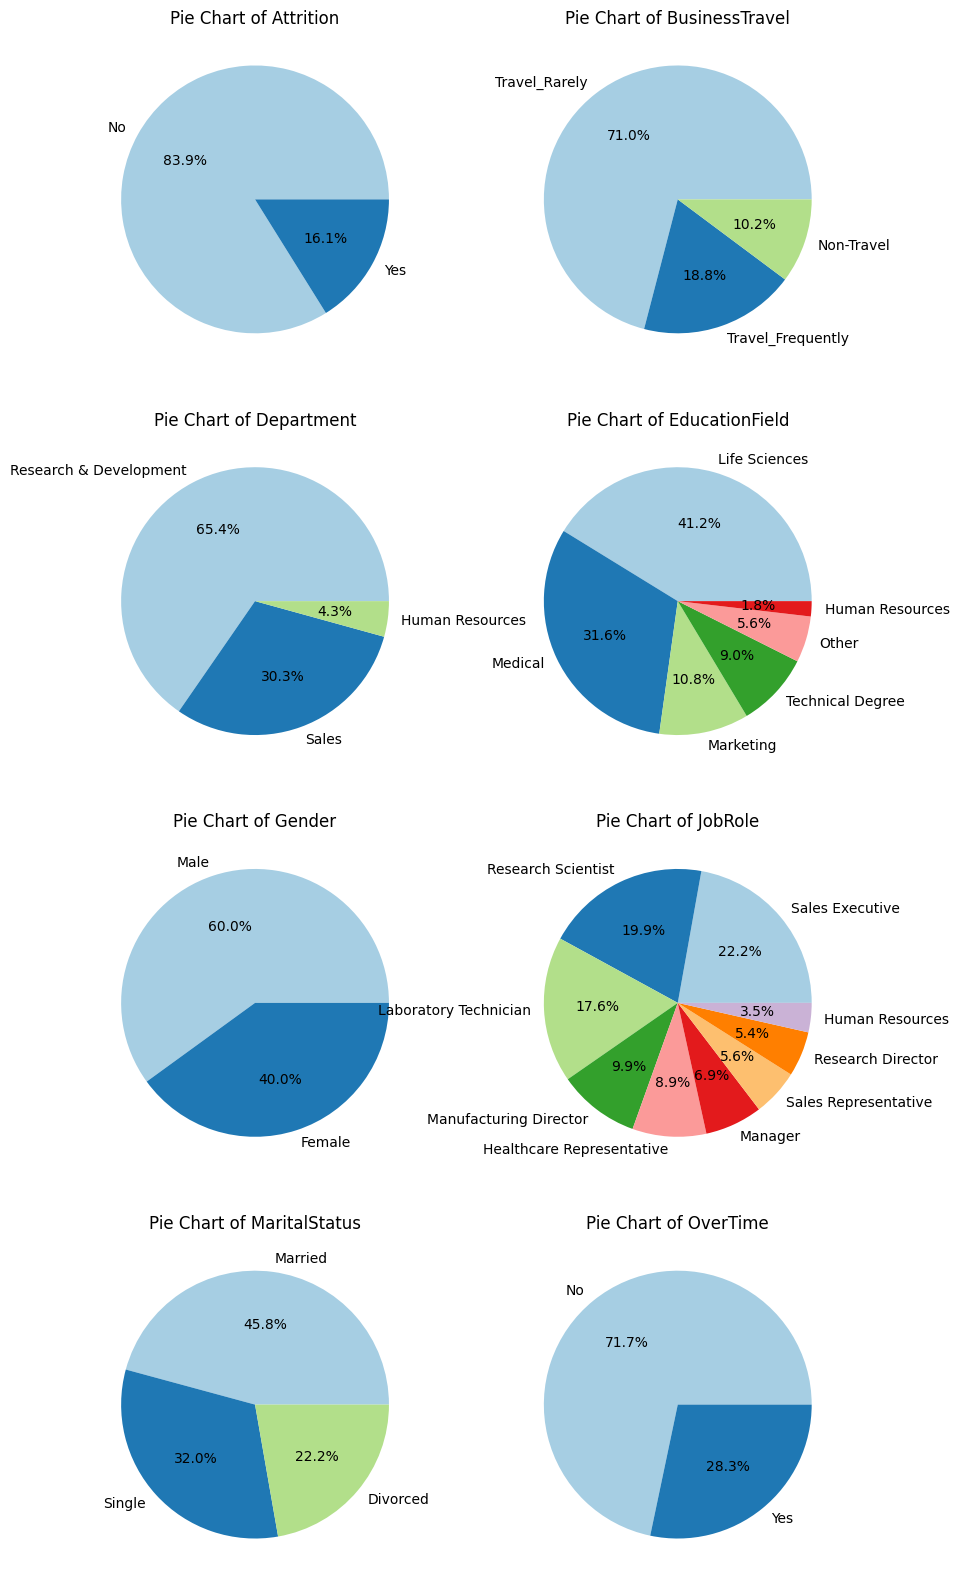

In [67]:
fig, axes = plt.subplots(round(len(categorical_columns)/2 + 0.4), 2, figsize=(10, 20))
axes = axes.flatten()

for idx, column in enumerate(categorical_columns):
    values = df[column].value_counts()
    
    axes[idx].pie(values, labels=values.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
    axes[idx].set_title(f'Pie Chart of {column}')

plt.subplots_adjust() # wspace=0.7, wspace=0.3
plt.show()


# Insert the other data visulisations here

# Assumption Checks

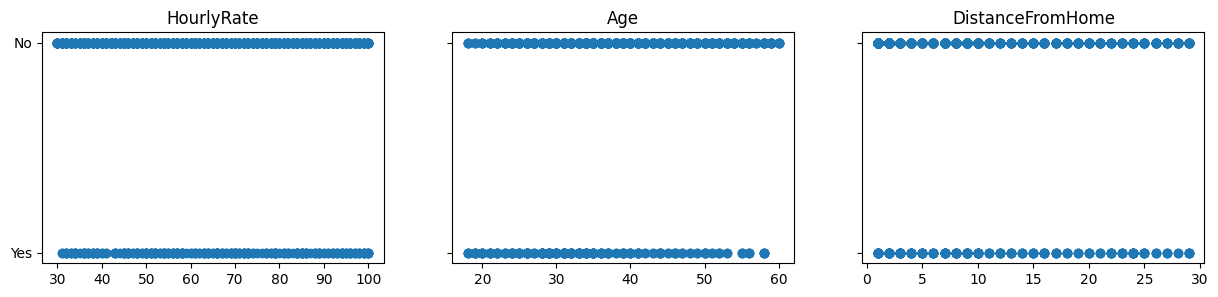

In [68]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(df['HourlyRate'],df['Attrition'])
ax1.set_title('HourlyRate')
ax2.scatter(df['Age'],df['Attrition'])
ax2.set_title('Age')
ax3.scatter(df['DistanceFromHome'],df['Attrition'])
ax3.set_title('DistanceFromHome')

plt.show() 

In [69]:
rate_att=df.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
rate_att['MonthlyIncome']=round(rate_att['MonthlyIncome'],-3)
rate_att=rate_att.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
fig=px.line(rate_att,x='MonthlyIncome',y='Counts',color='Attrition',title='Monthly Income basis counts of People in an Organisation')
fig.show()

/var/folders/mk/nkw282756n1fph48yl8yn0bm0000gn/T/ipykernel_20000/1417453690.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/mk/nkw282756n1fph48yl8yn0bm0000gn/T/ipykernel_20000/1417453690.py:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Interpreation goes here.

# Prediction- Considering all the inputs!

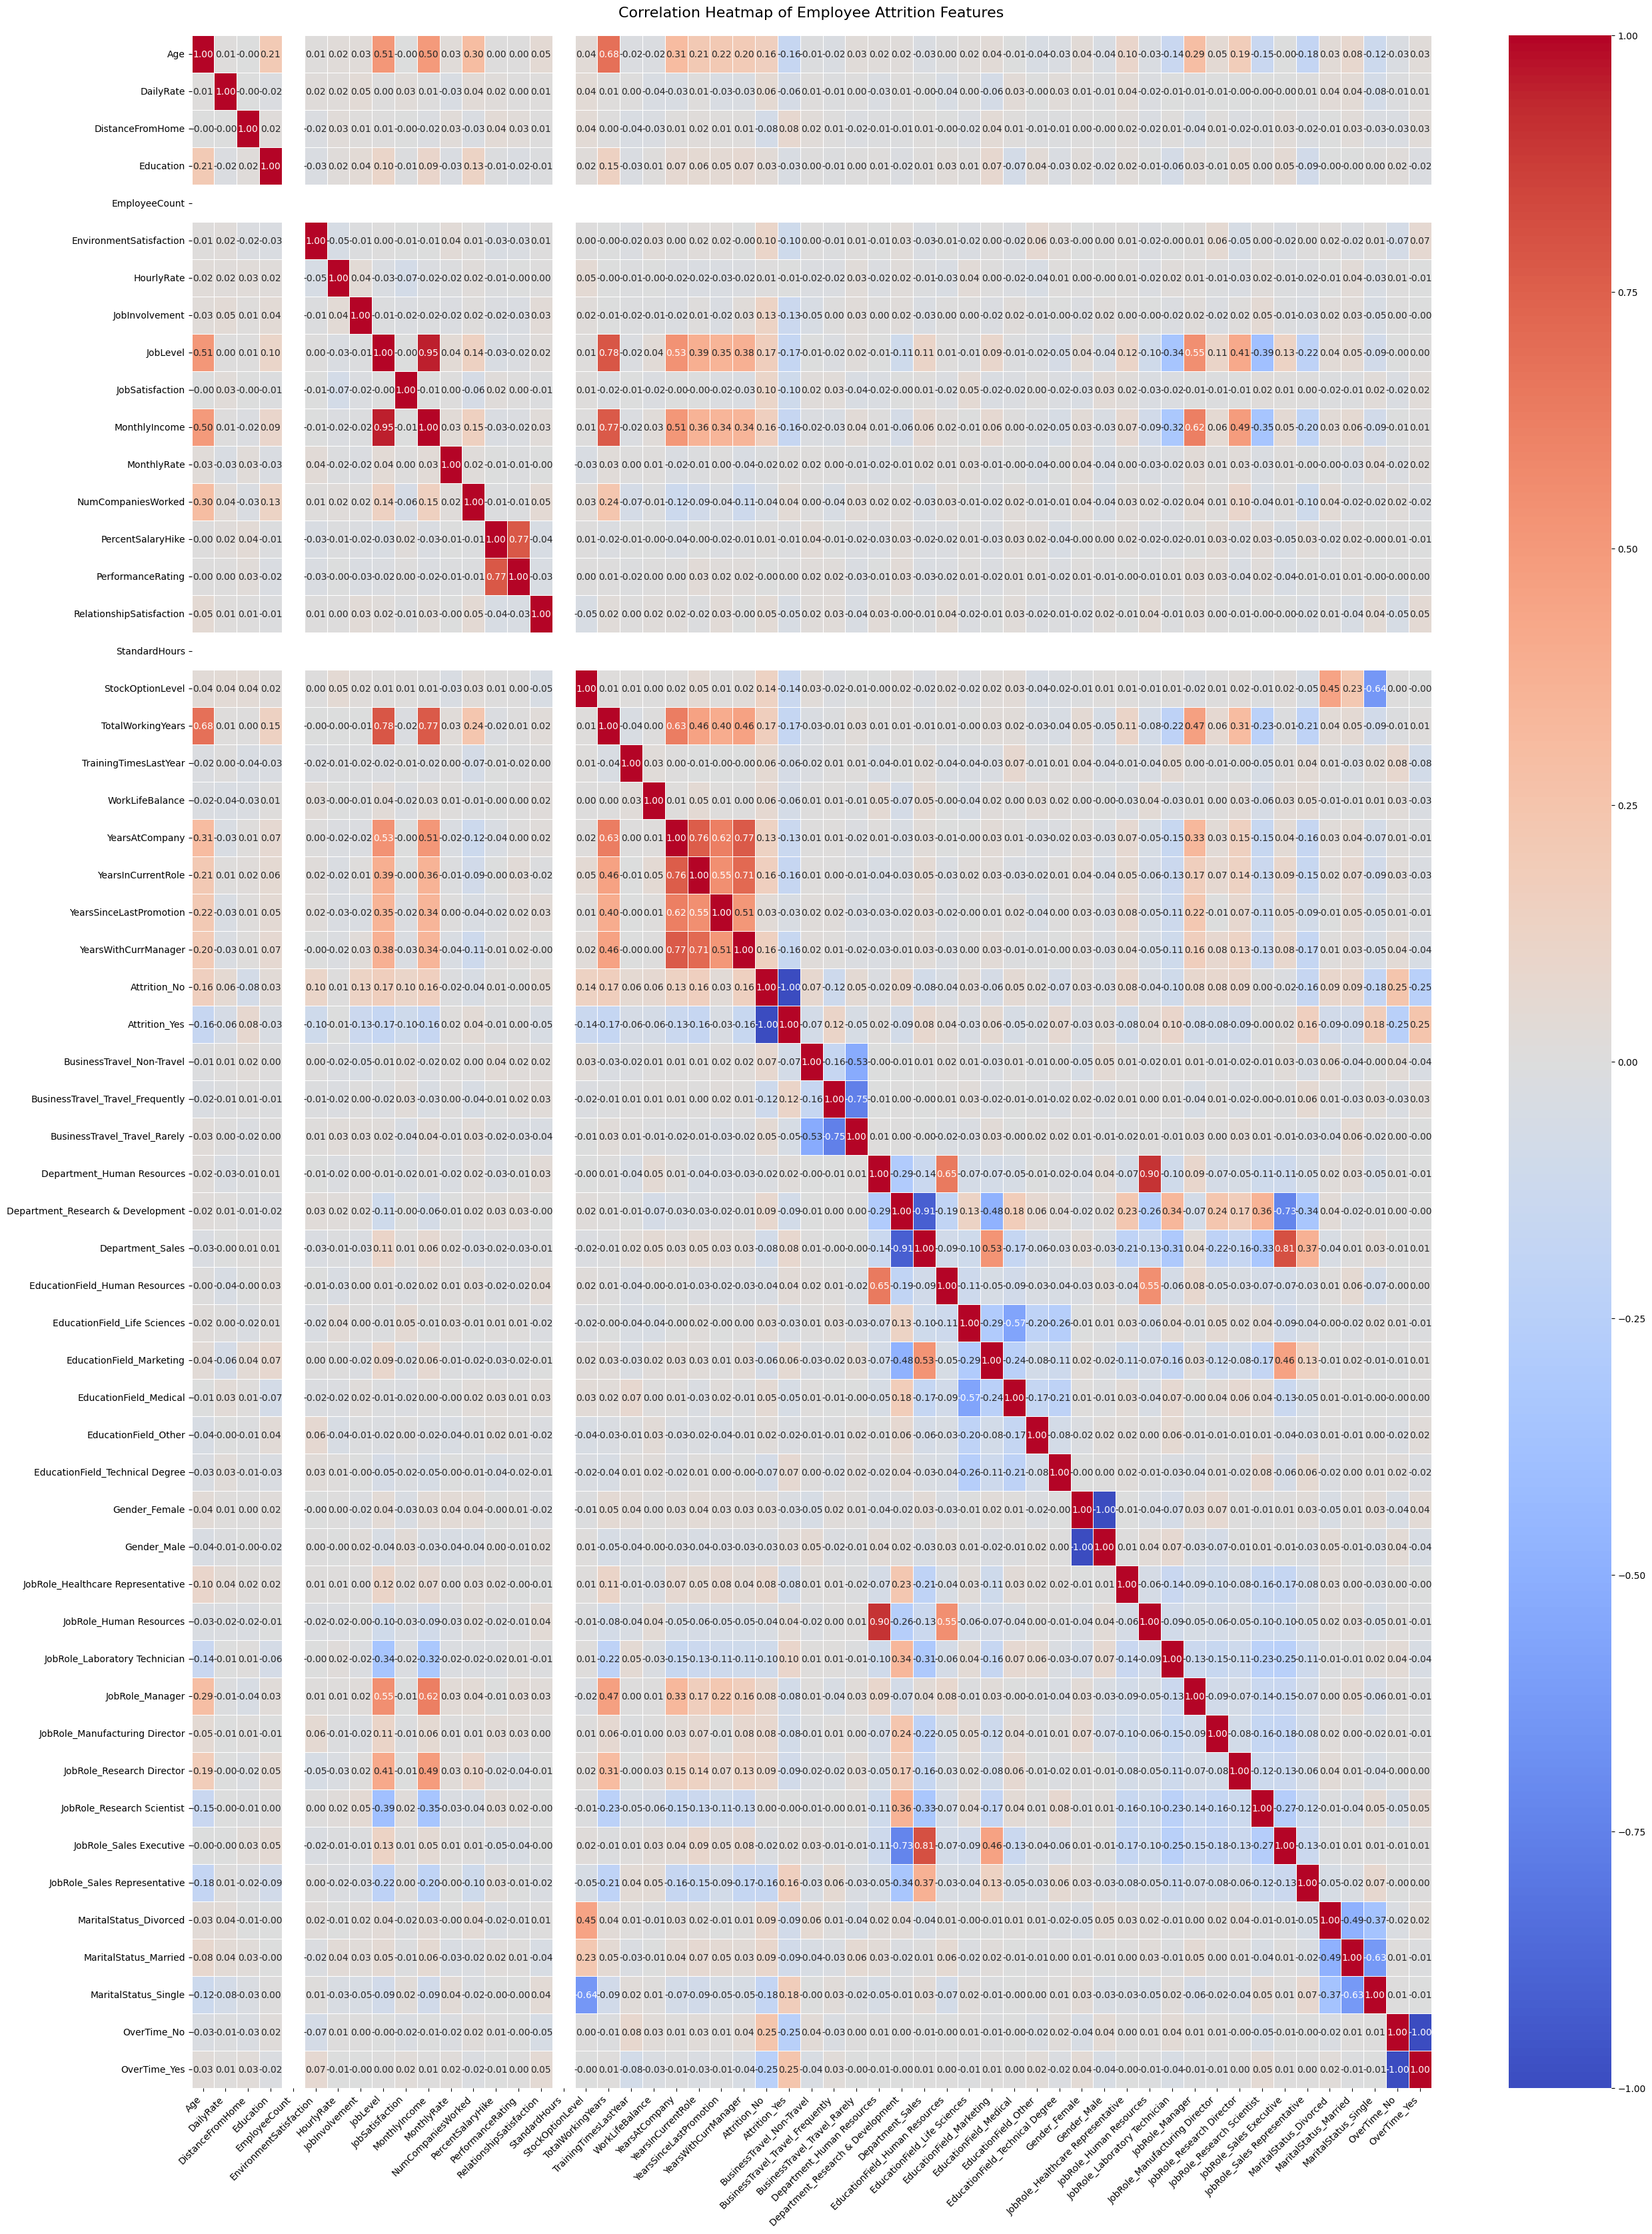

In [73]:
df_encoded = pd.get_dummies(df) # One-hot encode the categorical vars. This method was selected due to the nominal nature of the vars. # , drop_first=True

plt.figure(figsize=(30, 40))  
sns.heatmap(df_encoded.corr(), annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 10}, 
            linewidths=0.5)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10) 

plt.title('Correlation Heatmap of Employee Attrition Features', fontsize=16, pad=20)

plt.show()

There appears to be a strong relationship between attrition and those who work overtime.

In [90]:
X = df[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
# X = df[df.columns.drop('Attrition')]
y = df[['Attrition']].values.ravel()



X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=42)

# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression

# # Scale the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Fit the logistic regression model
# model = LogisticRegression(solver='lbfgs', max_iter=1000)
# model.fit(X_scaled, y)


model = LogisticRegression(C=1000, max_iter=10000)
model.fit(X_train,y_train)
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Traning Model accruracy scores: {:.3f}'.format(model.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(model.score(X_test,y_test)))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Logistic Regression:
Traning Model accruracy scores: 0.848
Test Model accruracy scores: 0.878
--------------------------------------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [92]:
data_dummies = pd.get_dummies(df)
features = data_dummies[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 
       'OverTime_No', 'OverTime_Yes']] # 'Over18_Y', 'EmployeeNumber'
X=features.values
y=data_dummies[['Attrition_Yes']].values.ravel()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
model = LogisticRegression(C=1000,max_iter=10000)
model.fit(X_train,y_train)
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Traning Model accruracy scores: {:.3f}'.format(model.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(model.score(X_test,y_test)))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Logistic Regression:
Traning Model accruracy scores: 0.897
Test Model accruracy scores: 0.897
--------------------------------------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# Use the Model to predict 5 new cases

In [16]:
new_cases = np.array([
    [29, 1100, 5, 3, 3, 45, 2, 2, 4, 4000, 13000, 2, 12, 3, 2, 80, 1, 6, 3, 3, 3, 2, 2, 4],
    [40, 1400, 12, 4, 4, 60, 3, 3, 2, 6000, 16000, 3, 15, 4, 3, 80, 2, 15, 4, 4, 10, 5, 3, 7],
    [33, 1000, 8, 2, 2, 50, 3, 1, 3, 4500, 14500, 1, 8, 2, 4, 80, 0, 5, 2, 3, 7, 4, 1, 3],
    [25, 900, 3, 1, 1, 40, 1, 1, 3, 3500, 12000, 0, 10, 3, 3, 80, 1, 2, 1, 2, 2, 1, 1, 2], 
    [45, 1800, 15, 5, 5, 80, 4, 4, 5, 7000, 20000, 4, 20, 4, 4, 80, 3, 20, 5, 5, 15, 10, 5, 10]
])

predictions = model.predict(new_cases)
print(predictions)

['No' 'No' 'No' 'Yes' 'No']


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

